# Descriptor Function Developments

### Introduction

The purpose of this notebook is to discuss the principles behind the descriptor generating functions used to analyze battery data. It explains the inputs and outputs from the overall package as well as the components that make up the function.

### Installation guidelines

These functions require the following pip installs

```
pip install lmfit
pip install numpy
pip install pandas
pip install peakutils
pip install scipy
```

## Imports

In [5]:
import scipy.io
import scipy.signal
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os 

import zipfile
import requests
import xlrd
import matplotlib
 
import seaborn as sns
import statistics as stats
from math import isclose

%matplotlib inline

## Nicole's imports

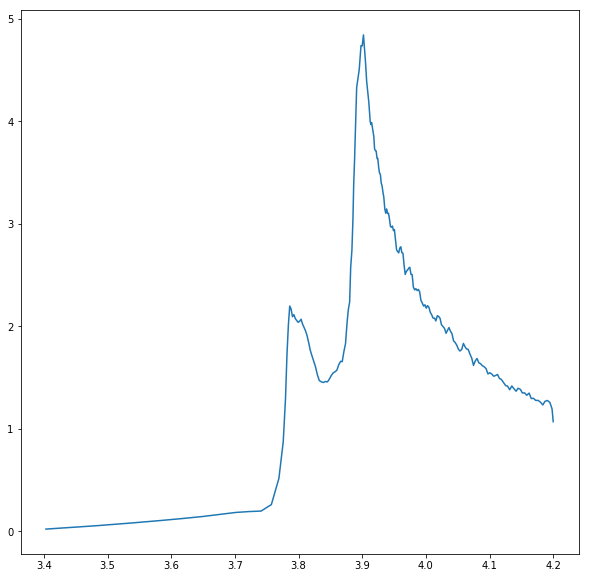

In [2]:
import chachifuncs_sepcd as ccf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#chachifuncs.load_sep_cycles('NLT_Test/NLT_TestSource/', 'NLT_Test/NLT_TestSepCycles/')
# I had to make this first directory (source) just as a small set of the data to test this code on, and then had to make a 
#directory for where I wanted my cycles to be stored in once they were seperated out. This code takes a while to run.
testdf = pd.read_excel('NLT_Test/Clean_Separated_Cycles/CS2_33_10_04_10-Cycle10Clean.xlsx')
#just picked a random one out of the separated out cycles

charge, discharge = ccf.sep_char_dis(testdf)

fig = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
plt.plot(charge['Voltage(V)'], charge['Smoothed_dQ/dV'])


Text(0,0.5,'dQ/dV')

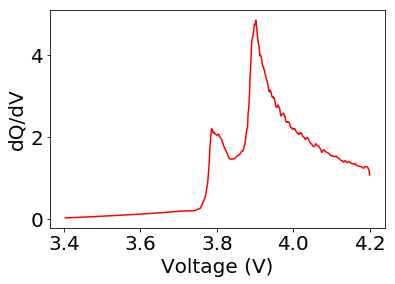

In [3]:
sigx_bot = pd.to_numeric(charge['Voltage(V)']).as_matrix()
sigy_bot = pd.to_numeric(charge['Smoothed_dQ/dV']).as_matrix()

plt.rcParams.update({'font.size':20})
#fig, ax = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
plt.plot(sigx_bot, sigy_bot, 'r')
plt.xlabel('Voltage (V)')
plt.ylabel('dQ/dV')



## ML Prep stuff

In [3]:
import descriptors

charge_descript, discharge_descript, name = descriptors.imp_all('data/Clean_Separated_Cycles', 'CS2_33_10_04_10')
df = descriptors.pd_create(charge_descript, name, 'c')
descriptors.pd_update(df, charge_descript)

C:\Users\Theodore Cohen\Desktop\Direct\chachies\chachies\descriptors.py:57: RuntimeWarning: divide by zero encountered in double_scalars
  i = peakutils.indexes(sigy_smooth, thres=3/max(sigy_smooth), min_dist=9)
c:\python\lib\site-packages\peakutils\peak.py:37: RuntimeWarning: invalid value encountered in double_scalars
  thres = thres * (np.max(y) - np.min(y)) + np.min(y)


data/Clean_Separated_Cycles\CS2_33_10_04_10-Cycle1Clean.xlsx


,Name,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9
0,CS2_33_10_04_10,6.245338e+05,-7.219103e+05,310278.247811,-58797.55871,3.659013,677.993940,0.037453,3.584335,391.216016,0.014332
1,CS2_33_10_04_10,1.169960e+06,-1.329735e+06,561028.227963,-104207.50166,3.670352,1749.767111,0.033049,3.589681,961.357581,0.010910


In [3]:
import chachifuncs_sepcd as ccf
ccf.get_all_data('NLT_Test/', 'NLT_TestSource/')

All data separated into cycles and saved in folder "data/Separated_Cycles". 
All cycles cleaned and saved in folder "data/Clean_Separated_Cycles".
All clean cycles recombined and saved in folder "data/Clean_Whole_Sets".


In [1]:
ls = []
not ls

True

In [ ]:
%%time
import descriptors
df = descriptors.ML_generate('NLT_Test/Clean_Separated_Cycles')
df.columns

Successfully extracted all battery names for c
Fitting battery: CS2_33_10_04_10 c
Fitting battery: CS2_33_12_23_10 c
Cycle 46 in battery CS2_33_12_23_10 had fewer than 10 datapoints and was removed from the dataset.
Successfully extracted all battery names for d
Fitting battery: CS2_33_10_04_10 d


In [2]:
import descriptors as ds
df_ch_list = ds.df_generate('NLT_Test/Clean_Separated_Cycles', 'c')
df_ch = ds.df_combine(df_ch_list, 'c')

Successfully extracted all battery names for c
Fitting battery: CS2_33_10_04_10 c
Empty DataFrame
Columns: [ch_0, ch_1, ch_2, ch_3, ch_4, ch_5, ch_6, ch_7, ch_8, ch_9, ch_10, ch_11, ch_12, ch_13, ch_14, ch_15, ch_16, ch_17, ch_18]
Index: []
Fitting battery: CS2_33_12_23_10 c
Cycle 46 in battery CS2_33_12_23_10 had fewer than 10 datapoints and was removed from the dataset.
Empty DataFrame
Columns: [ch_0, ch_1, ch_2, ch_3, ch_4, ch_5, ch_6, ch_7, ch_8, ch_9, ch_10, ch_11, ch_12, ch_13, ch_14, ch_15, ch_16, ch_17, ch_18]
Index: []


In [5]:
df_ch_list[0].head()

,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,ch_17,ch_18


In [1]:
import descriptors
df_ch_list = descriptors.df_generate('NLT_Test/Clean_Separated_Cycles', 'd')

Successfully extracted all battery names for d
Fitting battery: CS2_33_10_04_10 d
1
2
3
4
5
6
7
Fitting battery: CS2_33_12_23_10 d
4
5
6
7
42
43
44
45
Cycle 46 in battery CS2_33_12_23_10 had fewer than 10 datapoints and was removed from the dataset.
46


In [2]:
df_ch_list

,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9,dc_10,dc_11,dc_12,dc_13,dc_14,dc_15,dc_16,dc_17,dc_18,names
0,2005.566636,-2232.386441,920.297963,-166.613176,3.663711,4.170250,0.039360,3.584335,1.937417,0.007358,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,CS2_33_10_04_10
0,1742.675143,-1926.524685,787.567531,-141.149765,3.671162,4.176367,0.038942,3.589681,2.191244,0.009223,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,CS2_33_10_04_10
0,-657.336834,968.090871,-513.163369,117.042964,3.825054,1.659234,1.672843,3.674402,4.139920,0.039893,3.587737,2.253188,0.013333,0.0,0.0,0.0,0.0,0.0,0.0,CS2_33_10_04_10
0,2035.012508,-2264.402355,933.632308,-169.132843,3.664683,4.078128,0.039683,3.584497,2.002726,0.008227,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,CS2_33_10_04_10
0,2011.601988,-2238.179930,922.338069,-166.917929,3.662253,4.017390,0.038222,3.584497,1.993491,0.131548,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,CS2_33_10_04_10
0,1895.231654,-2101.550216,862.550888,-155.366471,3.665331,4.098095,0.038426,3.585145,2.039043,0.008425,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,CS2_33_10_04_10
0,2150.440103,-2417.977864,1007.557657,-184.518867,3.661767,4.177352,0.037737,3.583039,2.004572,0.007205,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,CS2_33_10_04_10
0,1536.423595,-1684.675560,681.909015,-120.719366,3.655773,3.143231,0.049140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,CS2_33_12_23_10
0,1544.866517,-1695.163612,686.754844,-121.703424,3.645730,3.101615,0.049513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,CS2_33_12_23_10
0,1525.233274,-1676.439383,680.212812,-120.715885,3.649293,3.011011,0.048699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,CS2_33_12_23_10


### Test Data

In [1]:
import descriptors

dict_test = descriptors.imp_one_cycle('NLT_Test/Clean_Separated_Cycles/CS2_33_10_04_10-Cycle5Clean.xlsx', 'c', 5, 'bat')
dict_test

{'coefficients': [7652.963400582357,
  -7589.172427356773,
  2799.767722083186,
  -455.14700355610034],
 'peakFWHM': [0.015839909514060446, 0.030048753404825046],
 'peakHeight(dQdV)': [2.145341705136011, 4.106266915550113],
 'peakLocation(V)': [3.800107717514038, 3.912367820739746]}

In [5]:
lst = descriptors.dict_2_list(dict_test)
lst

[7652.963400582357,
 -7589.172427356773,
 2799.767722083186,
 -455.14700355610034,
 3.800107717514038,
 2.145341705136011,
 0.015839909514060446,
 3.912367820739746,
 4.106266915550113,
 0.030048753404825046]

In [6]:
dfb = descriptors.pd_create('c')
descriptors.pd_update(dfb, dict_test)

[7652.963400582357, -7589.172427356773, 2799.767722083186, -455.14700355610034, 3.800107717514038, 2.145341705136011, 0.015839909514060446, 3.912367820739746, 4.106266915550113, 0.030048753404825046]
Empty DataFrame
Columns: [ch_0, ch_1, ch_2, ch_3, ch_4, ch_5, ch_6, ch_7, ch_8, ch_9, ch_10, ch_11, ch_12, ch_13, ch_14, ch_15, ch_16, ch_17, ch_18]
Index: []
          ch_0         ch_1         ch_2        ch_3      ch_4      ch_5  \
0  7652.963401 -7589.172427  2799.767722 -455.147004  3.800108  2.145342   

      ch_6      ch_7      ch_8      ch_9  ch_10  ch_11  ch_12  ch_13  ch_14  \
0  0.01584  3.912368  4.106267  0.030049    0.0    0.0    0.0    0.0    0.0   

   ch_15  ch_16  ch_17  ch_18  
0    0.0    0.0    0.0    0.0  


,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,ch_17,ch_18
0,7652.963401,-7589.172427,2799.767722,-455.147004,3.800108,2.145342,0.01584,3.912368,4.106267,0.030049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df = pd.DataFrame(columns = ['foo', 'ba'])
df1 = pd.DataFrame([[1,2]], columns = ['foo','ba'])
print (df, df1)

Empty DataFrame
Columns: [foo, ba]
Index: []    foo  ba
0    1   2


In [61]:
pd.concat([df,df1])

,foo,ba
0,1,2


### Descriptor Plotting

In [30]:
bat1 = df.iloc[0:22, :]

bat2 = df.iloc[23:, :]
bat2['ch_7'][bat2['ch_7']!=0]

23    3.96712
24    3.95967
25    3.95287
26    3.95449
27     3.9574
28    3.96226
29     3.9668
30    3.96534
31    3.96064
32    3.95303
33    3.95983
34    3.96226
35    3.95821
36    3.95368
37    3.95643
38     3.9493
39    3.95254
40    3.94703
41    3.95222
42    3.94655
43     3.9493
44    3.95384
45    3.94298
46    3.95562
47    3.95287
48    3.96129
50    3.95902
51    3.95756
52    3.95773
53     3.9553
54    3.95821
55    3.96097
56    3.96097
57    3.96129
58    3.95708
60    3.95643
61    3.95708
62    3.96323
64    3.96275
67    3.97328
Name: ch_7, dtype: object

Text(0,0.5,'dQ/dV of Peak')

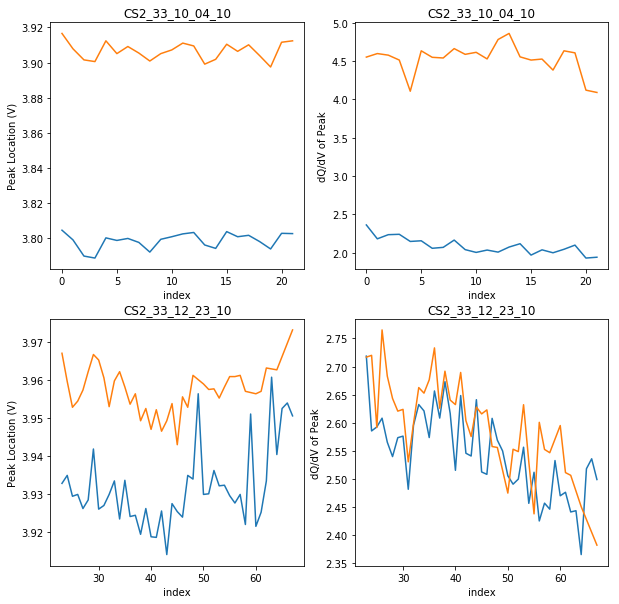

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
#plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
axes[0, 0].plot(bat1.index, bat1['ch_4'], bat1.index, bat1['ch_7'])
axes[0, 0].set_title('CS2_33_10_04_10')
axes[0, 0].set_xlabel('index')
axes[0, 0].set_ylabel('Peak Location (V)')
axes[0, 1].plot(bat1.index, bat1['ch_5'], bat1.index, bat1['ch_8'])
axes[0, 1].set_title('CS2_33_10_04_10')
axes[0, 1].set_xlabel('index')
axes[0, 1].set_ylabel('dQ/dV of Peak')
axes[1, 0].plot(bat2.index, bat2['ch_4'], bat2['ch_7'][bat2['ch_7']!=0].index, bat2['ch_7'][bat2['ch_7']!=0])
axes[1, 0].set_title('CS2_33_12_23_10')
axes[1, 0].set_xlabel('index')
axes[1, 0].set_ylabel('Peak Location (V)')
axes[1, 1].plot(bat2.index, bat2['ch_5'], bat2['ch_8'][bat2['ch_8']!=0].index, bat2['ch_8'][bat2['ch_8']!=0])
axes[1, 1].set_title('CS2_33_12_23_10')
axes[1, 1].set_xlabel('index')
axes[1, 1].set_ylabel('dQ/dV of Peak')

In [1]:
import descriptors
charge_desc, discharge_desc = descriptors.imp_all('NLT_test/Clean_Separated_Cycles', 'CS2_33_10_04_10')

NLT_test/Clean_Separated_Cycles\CS2_33_10_04_10-Cycle23Clean.xlsx


In [2]:
discharge_desc[0]
desc = descriptors.pd_create(discharge_desc, 'name', 'd')
desc

,Name,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9,dc_10,dc_11,dc_12
0,name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Peak Utils Peak finder

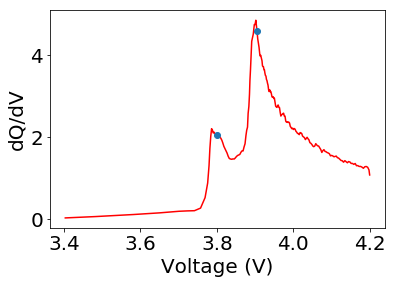

In [6]:

sigy_smooth = scipy.signal.savgol_filter(sigy_bot, 25, 3)
import peakutils
i = peakutils.indexes(sigy_smooth, thres=.3/max(sigy_bot), min_dist=9)
#i = scipy.signal.find_peaks_cwt(sigy, sigx*9)

plt.rcParams.update({'font.size':20})
#fig, ax = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
plt.plot(sigx_bot, sigy_bot, 'r')
plt.xlabel('Voltage (V)')
plt.ylabel('dQ/dV')
plt.plot(sigx_bot[i], sigy_bot[i], 'o')

Function Version

In [36]:
import peakutils
import scipy.signal

def peak_finder(V_series, dQdV_series, cd):
    
    sigx, sigy = cd_dataframe(V_series, dQdV_series, cd)
    
    sigy_smooth = scipy.signal.savgol_filter(sigy, 25, 3)
        
    i = peakutils.indexes(sigy_smooth, thres=3/max(sigy_smooth), min_dist=9)
    return i

def cd_dataframe(V_series, dQdV_series, cd):
    """Classifies and flips differential capactity data.
        V_series = Pandas series of voltage data
        dQdV_series = Pandas series of differential capacity data
        cd = either 'c' for charge and 'd' for discharge."""
    
    sigx = pd.to_numeric(V_series).as_matrix()
    if cd == 'c':      
        sigy = -pd.to_numeric(dQdV_series).as_matrix()
    elif cd == 'd':
        sigy = pd.to_numeric(dQdV_series).as_matrix()
    
    return sigx, sigy
    

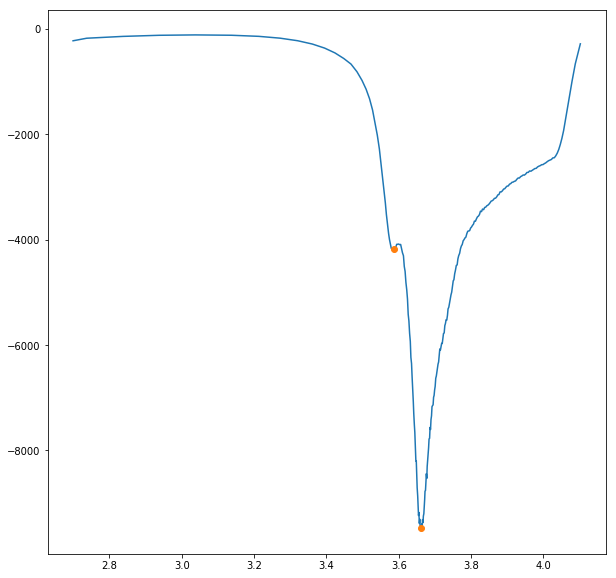

In [37]:
i = peak_finder(charge['Voltage(V)'], charge['Smoothed_dQ/dV'], 'c')

fig = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
myplot = plt.plot(charge['Voltage(V)'], charge['Smoothed_dQ/dV'])
myplot = plt.plot(charge.loc[i, 'Voltage(V)'], charge.loc[i, 'Smoothed_dQ/dV'], 'o')

## LMfit

lmfit is an open-source fitting platform based on `scipy.optimize.leastsq`. It uses a Levenberg-Marquart algorithm with numerically-calculated derivatives from MINPACK's lmdif function. For our use case. We needed to fit a mixture of Pseudo-Voight distributions with a 4th degree polynomial background. The Pseudo-Voight distribution has the following form:

$$f_v(x,A,\mu,\sigma,\alpha)=\frac{(1−\alpha)A}{\sigma_g \sqrt{2 \pi}}\exp{[−{(x− \mu)}_2/2 {\sigma_g}^2]}+\frac{\alpha A}{\pi}[\frac{\sigma}{{(x-\mu)}^2 + \sigma^2}]$$
$$\sigma_g = \sigma/\sqrt{2 \ln{2}}$$

In this model $A$ is the amplitude of the peak, $\mu$ is the center of the distribution, $\sigma$ and $\alpha$ is the fraction of Lorenzian character.

This function was used to develop and fit the following, not linear model:

$$f(x) = \sum_{i=0}^{3}c_i x^i + \sum_{j=1}^{n}f_{vj}(x,A_j,\mu_j,\sigma_j,\alpha_j)$$

Where $n$ is the number of peaks determined by the peak fitting function `peak_finder`

## LMfit function

In [29]:
from lmfit import models

def model_gen(V_series, dQdV_series, cd, i):
    """Develops initial model and parameters for battery data fitting.

V_series = Pandas series of voltage data
dQdV_series = Pandas series of differential capacity data
cd = either 'c' for charge and 'd' for discharge.

Output:
par = lmfit parameters object
mod = lmfit model object"""
    
    sigx_bot, sigy_bot = cd_dataframe(V_series, dQdV_series, cd)
    
    mod = models.PolynomialModel(4)
    par = mod.guess(sigy_bot, x=sigx_bot)
    #i = np.append(i, i+5)
    #print(i)

    for index in i:
        
        center, sigma, amplitude, fraction, comb = label_gen(index)
        
        gaus_loop = models.PseudoVoigtModel(prefix=comb)
        par.update(gaus_loop.make_params())

        par[center].set(sigx_bot[index], vary=False)
        par[sigma].set(0.001)
        par[amplitude].set(5, min=0)
        par[fraction].set(.5, min=0, max=1)

        mod = mod + gaus_loop
        
    return par, mod

def model_eval(V_series, dQdV_series, cd, par, mod):
    sigx_bot, sigy_bot = cd_dataframe(V_series, dQdV_series, cd)
    
    model = mod.fit(sigy_bot, par, x=sigx_bot)
    #print(model.fit_report(min_correl=0.5))

    fig = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
    plt.plot(sigx_bot, sigy_bot)
    #plt.plot(sigx_bot, model.init_fit, 'k--')
    plt.plot(sigx_bot, model.best_fit, 'r-')
    
    return model

def label_gen(index):
    """Generates label set for individual gaussian
index = index of peak location

output string format: 
'a' + index + "_" + parameters"""
    
    pref = str(int(index))
    comb = 'a' + pref + '_'
    
    cent = 'center'
    sig = 'sigma'
    amp = 'amplitude'
    fract = 'fraction'
    
    center = comb + cent
    sigma = comb + sig
    amplitude = comb + amp
    fraction = comb + fract
    
    return center, sigma, amplitude, fraction, comb
    

[ 21 160 205]
[[Model]]
    (((Model(polynomial) + Model(pvoigt, prefix='a21_')) + Model(pvoigt, prefix='a160_')) + Model(pvoigt, prefix='a205_'))
[[Fit Statistics]]
    # function evals   = 20606
    # data points      = 238
    # variables        = 14
    chi-square         = 505317050.683
    reduced chi-square = 2255879.691
    Akaike info crit   = 3495.285
    Bayesian info crit = 3543.897
[[Variables]]
    c0:               1.5145e+07 +/- 0        (0.00%) (init= 1.509032e+07)
    c1:              -1.7346e+07 +/- 0        (0.00%) (init=-1.733631e+07)
    c2:               7.3845e+06 +/- 0        (0.00%) (init= 7388906)
    c3:              -1.3857e+06 +/- 0        (0.00%) (init=-1385266)
    c4:               96784.7023 +/- 0        (0.00%) (init= 96460.89)
    a21_fraction:     1          +/- 0        (0.00%) (init= 0.5)
    a21_sigma:        0.26181188 +/- 0        (0.00%) (init= 0.001)
    a21_center:       4.004055 (fixed)
    a21_amplitude:    1864.94461 +/- 0        (0.00%) 

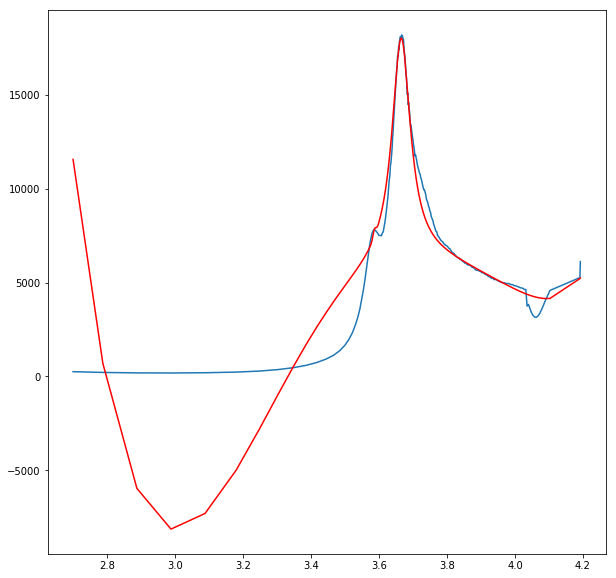

In [57]:
par, mod = model_gen(charge['Voltage(V)'], charge['Smoothed_dQ/dV'], 'c', i)

model = model_eval(charge['Voltage(V)'], charge['Smoothed_dQ/dV'], 'c', par, mod)

In [41]:
model.best_values

{'a160_amplitude': 1204.5866768625697,
 'a160_center': 3.665168762207031,
 'a160_fraction': 0.9999395740501419,
 'a160_sigma': 0.03271931592717259,
 'a205_amplitude': 4.396018661100393,
 'a205_center': 3.586440801620483,
 'a205_fraction': 1.0103029524088925e-13,
 'a205_sigma': 0.005223141124625519,
 'a21_amplitude': 1864.944618803519,
 'a21_center': 4.004055023193359,
 'a21_fraction': 0.999999999999958,
 'a21_sigma': 0.2618118855452114,
 'c0': 15144956.27369092,
 'c1': -17346234.574764214,
 'c2': 7384508.879733742,
 'c3': -1385730.6474814473,
 'c4': 96784.70232873314}

## Putting it all together

In [31]:
def descriptor_func(V_series,dQdV_series, cd):
    """Generates dictionary of descriptors

V_series = Pandas series of voltage data
dQdV_series = Pandas series of differential capacity data
cd = either 'c' for charge and 'd' for discharge."""
    sigx_bot, sigy_bot = cd_dataframe(V_series, dQdV_series, cd)
    
    i = peak_finder(V_series,dQdV_series, cd)
    
    par, mod = model_gen(V_series,dQdV_series, cd, i)

    model = model_eval(V_series,dQdV_series, cd, par, mod)
    
    sigx, sigy = cd_dataframe(V_series, dQdV_series, cd) 
    
    desc = {'peakLocation(V)': sigx[i], 'peakHeight(dQdV)': sigy[i]}
    
    FWHM = []
    for index in i:
        center, sigma, amplitude, fraction, comb = label_gen(index)
        FWHM.append(model.best_values[sigma])

    
    coefficients = []
    for k in np.arange(4):
        coef = 'c' + str(k)
        coefficients.append(model.best_values[coef])
        
    desc.update({'peakFWHM': FWHM, 'coefficients': coefficients})
    
    return desc
    
    

[ 21 160 205]
[[Model]]
    (((Model(polynomial) + Model(pvoigt, prefix='a21_')) + Model(pvoigt, prefix='a160_')) + Model(pvoigt, prefix='a205_'))
[[Fit Statistics]]
    # function evals   = 20606
    # data points      = 238
    # variables        = 14
    chi-square         = 505317050.683
    reduced chi-square = 2255879.691
    Akaike info crit   = 3495.285
    Bayesian info crit = 3543.897
[[Variables]]
    c0:               1.5145e+07 +/- 0        (0.00%) (init= 1.509032e+07)
    c1:              -1.7346e+07 +/- 0        (0.00%) (init=-1.733631e+07)
    c2:               7.3845e+06 +/- 0        (0.00%) (init= 7388906)
    c3:              -1.3857e+06 +/- 0        (0.00%) (init=-1385266)
    c4:               96784.7023 +/- 0        (0.00%) (init= 96460.89)
    a21_fraction:     1          +/- 0        (0.00%) (init= 0.5)
    a21_sigma:        0.26181188 +/- 0        (0.00%) (init= 0.001)
    a21_center:       4.004055 (fixed)
    a21_amplitude:    1864.94461 +/- 0        (0.00%) 

{'coefficients': [15144956.27369092,
  -17346234.574764214,
  7384508.879733742,
  -1385730.6474814473],
 'peakFWHM': [0.2618118855452114, 0.03271931592717259, 0.005223141124625519],
 'peakHeight(dQdV)': array([ 4818.08876597, 17977.98977003,  7819.18324064]),
 'peakLocation(V)': array([4.00405502, 3.66516876, 3.5864408 ])}

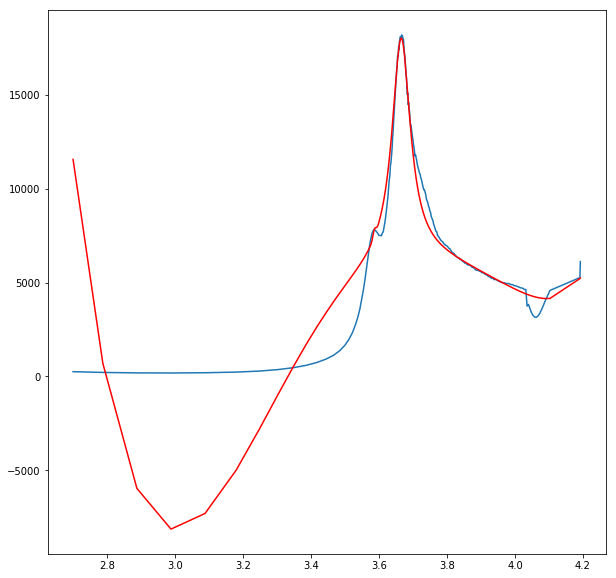

In [72]:
descriptor_func(charge['Voltage(V)'], charge['Smoothed_dQ/dV'], 'c')

In [70]:
i2 = np.array([i[-1] + 10])
for index in i2:
    pref = str(int(index))
    comb = 'a' + pref + '_'
    
    gaus_loop = models.GaussianModel(prefix=comb)
    par.update(gaus_loop.make_params())
    cent = 'center'
    sig = 'sigma'
    amp = 'amplitude'
    
    par[comb+cent].set(sigx_bot[index])
    par[comb+sig].set(0.01)
    par[comb+amp].set(500)

    mod = mod + gaus_loop

In [11]:
from lmfit import models

mod = models.PolynomialModel(4)
par = mod.guess(sigy_bot, x=sigx_bot)
#i = np.append(i, i+5)
print(i)


for index in i:
    pref = str(int(index))
    comb = 'a' + pref + '_'
    
    gaus_loop = models.PseudoVoigtModel(prefix=comb)
    par.update(gaus_loop.make_params())
    cent = 'center'
    sig = 'sigma'
    amp = 'amplitude'
    fract = 'fraction'
    
    #par[comb+cent].set(sigx_bot[index], min=sigx_bot[index]-0.005, max=sigx_bot[index]+0.005)
    par[comb+cent].set(sigx_bot[index], vary=False)
    par[comb+sig].set(0.01)
    par[comb+amp].set(.05, min=0)
    par[comb+fract].set(.5)

    mod = mod + gaus_loop

[22 64]


[[Model]]
    ((Model(polynomial) + Model(pvoigt, prefix='a22_')) + Model(pvoigt, prefix='a64_'))
[[Fit Statistics]]
    # function evals   = 1021
    # data points      = 193
    # variables        = 11
    chi-square         = 8.038
    reduced chi-square = 0.044
    Akaike info crit   = -591.448
    Bayesian info crit = -555.558
[[Variables]]
    c0:             -17364.2780 +/- 3.83e+03 (22.08%) (init= 48688.95)
    c1:              18630.8937 +/- 4.02e+03 (21.59%) (init=-50474.09)
    c2:             -7479.94472 +/- 1.58e+03 (21.12%) (init= 19569.17)
    c3:              1331.67910 +/- 275.1207 (20.66%) (init=-3363.19)
    c4:             -88.6972969 +/- 17.93580 (20.22%) (init= 216.2009)
    a22_fraction:   -51576.5699 +/- 3.34e+08 (647897.92%) (init= 0.5)
    a22_sigma:       0.02045949 +/- 0.001047 (5.12%) (init= 0.01)
    a22_center:      3.799298 (fixed)
    a22_amplitude:   3.2719e-06 +/- 0.021250 (649478.10%) (init= 0.05)
    a22_fwhm:        0.04091899 +/- 0.002095 (5.12%) 

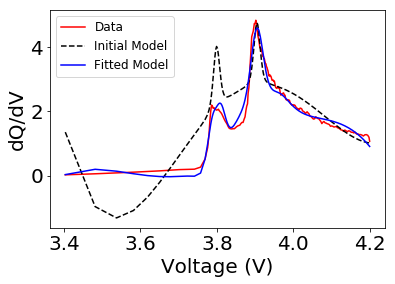

In [12]:
model = mod.fit(sigy_bot, par, x=sigx_bot)
print(model.fit_report(min_correl=0.5))

#fig = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
plt.plot(sigx_bot, sigy_bot, 'r')
plt.plot(sigx_bot, model.init_fit, 'k--')
plt.plot(sigx_bot, model.best_fit, 'b-')
plt.xlabel('Voltage (V)')
plt.ylabel('dQ/dV')
plt.rcParams.update({'font.size':20})
plt.legend(['Data', 'Initial Model', 'Fitted Model'], loc=2, fontsize=12)